<a href="https://colab.research.google.com/github/fiftybucks101/Mushroom-Dataset-Binary-Classification/blob/main/Binary_Classification_Mushroom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [24]:
# Kaggle Dataset Link : https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset
df = pd.read_csv('/content/mushroom_cleaned.csv')
df.head()

# Define and set color palette
col_palette = ['#8DA0CB', '#6B83A6', '#4B6584', '#344E73', '#2B3A67', '#23315B', '#1C2850', '#162046', '#111739']
sns.set_palette(col_palette)
column_colors = {col: color for col, color in zip(df.columns, col_palette)}

**EDA**
Objectives:


1.   Understand the distribution of dataset features
2.   Explore relationship between independent features and tagret varibale
3.   Detect outliers or anamoly which may require furthur investigation
4.   Basic info of dataset



In [25]:
# Basic Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [26]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [27]:
# drop duplicates rows if present

df.drop_duplicates(inplace=True)

**Exploration of Target Variable Class**

class
1    29372
0    24360
Name: count, dtype: int64


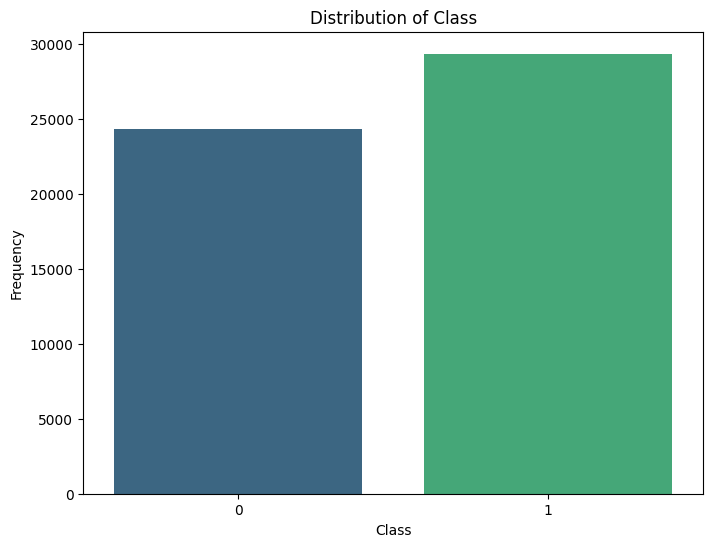

In [28]:
print(df['class'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x=df['class'],palette='viridis')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

**Visualizing Categorical Features**

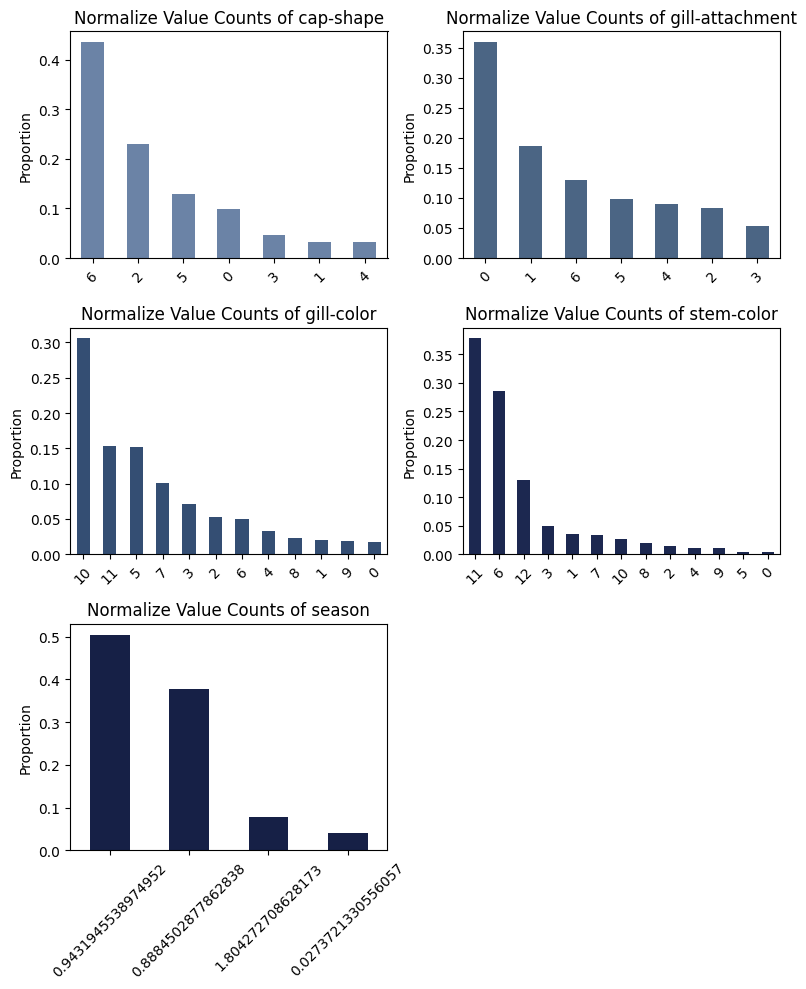

In [29]:
columns = ['cap-shape', 'gill-attachment','gill-color', 'stem-color', 'season']

fig, axs = plt.subplots(3,2,figsize=(8,10))

axs = axs.flatten()

for i, col in enumerate(columns):
  value_counts_norm = df[col].value_counts(normalize=True)
  value_counts_norm.plot(kind='bar', ax = axs[i],color=column_colors[col])
  axs[i].set_title(f"Normalize Value Counts of {col}")
  axs[i].set_xlabel(None)
  axs[i].set_ylabel('Proportion')
  axs[i].set_xticklabels(value_counts_norm.index,rotation=45)

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

**Visualizing Numerical Features**

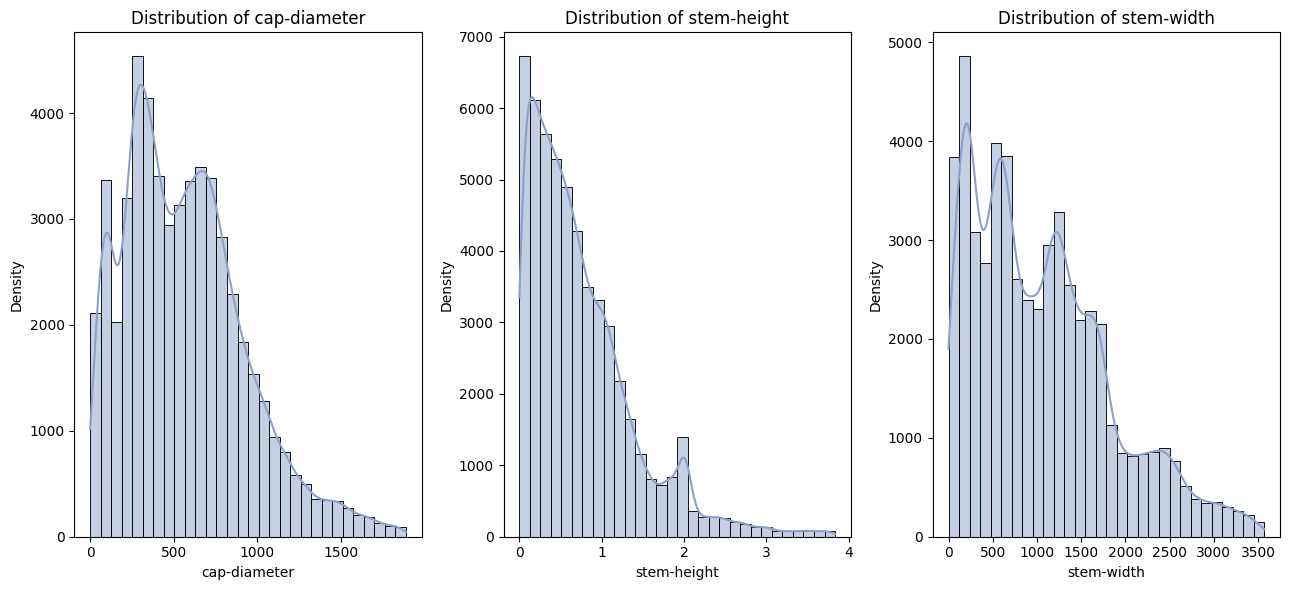

In [30]:
num_columns = ['cap-diameter', 'stem-height', 'stem-width']

fig, axs = plt.subplots(1, 3, figsize=(13, 6))

for i, col in enumerate(num_columns):
  ax = axs[i]
  sns.histplot(x=df[col],palette='viridis',kde=True,ax=ax,bins=30)
  ax.set_title(f'Distribution of {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Density')

plt.tight_layout()
plt.show()



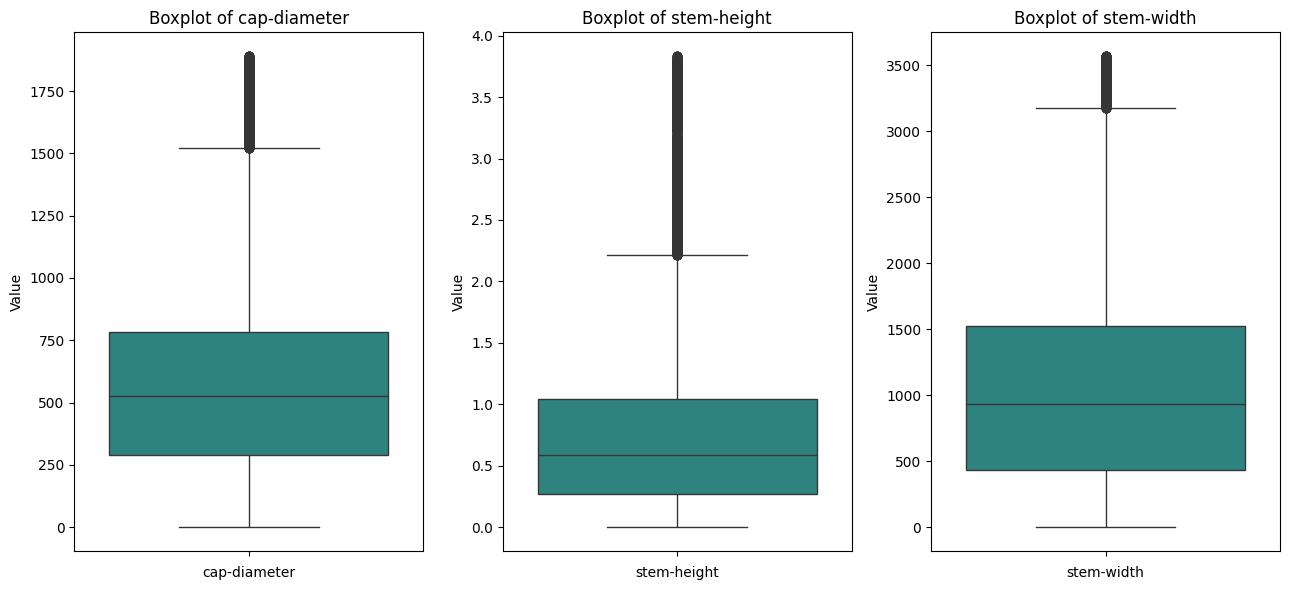

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(13, 6))
axs = axs.flatten()
for i, col in enumerate(num_columns):
  ax = axs[i]
  sns.boxplot(y=df[col],palette='viridis',ax=ax)
  ax.set_title(f'Boxplot of {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


In [32]:
# Calculate IQR and it's proportion of outliers in numerical columns

for i, col in enumerate(num_columns):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  print(f"IQR of {col}: ",iqr)

  # calculating and printing lower quartile outliers

  lower_outliers = df[df[col] < q1 - 1.5*iqr]
  lower_proportion = len(lower_outliers)/len(df)
  print(f"Number of lower outliers in {col}: {len(lower_outliers)}")
  print(f"Proportion of lower outliers in {col}: {lower_proportion:.2f}")

  # Calculate upper outliers
  upper_outliers = df[df[col] > q3 + 1.5 * iqr]
  proportion_upper_outliers = len(upper_outliers) / len(df)
  print(f"Number of upper outliers in {col}: {len(upper_outliers)}")
  print(f"Proportion of upper outliers in {col}: {proportion_upper_outliers:.2f}")


IQR of cap-diameter:  492.0
Number of lower outliers in cap-diameter: 0
Proportion of lower outliers in cap-diameter: 0.00
Number of upper outliers in cap-diameter: 955
Proportion of upper outliers in cap-diameter: 0.02
IQR of stem-height:  0.7767542445287261
Number of lower outliers in stem-height: 0
Proportion of lower outliers in stem-height: 0.00
Number of upper outliers in stem-height: 1851
Proportion of upper outliers in stem-height: 0.03
IQR of stem-width:  1097.0
Number of lower outliers in stem-width: 0
Proportion of lower outliers in stem-width: 0.00
Number of upper outliers in stem-width: 716
Proportion of upper outliers in stem-width: 0.01


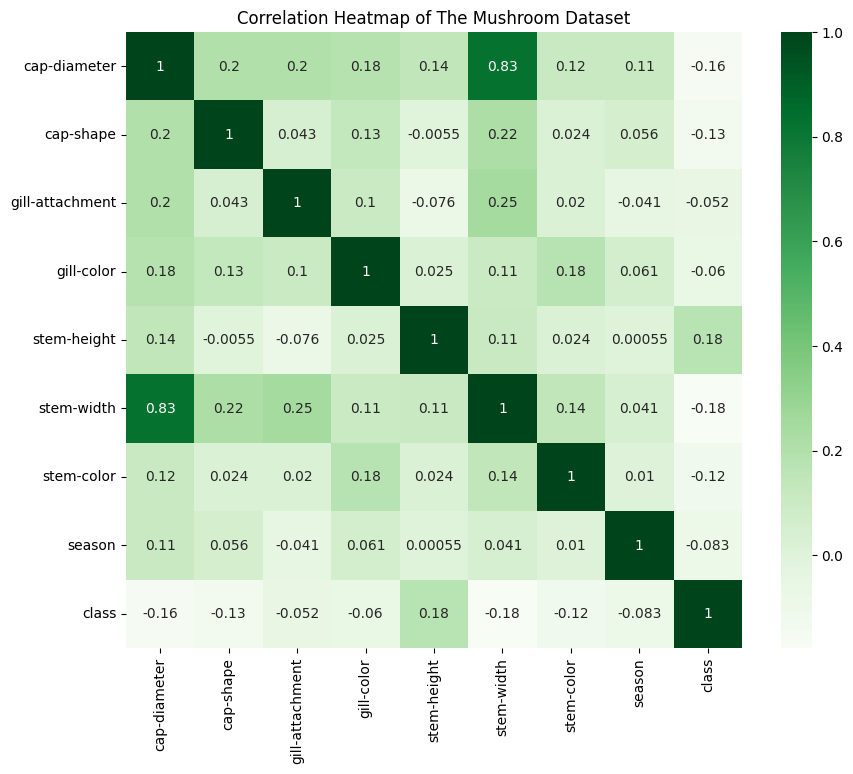

In [33]:
# plotting correlation in a heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,square=True,cmap='Greens')
plt.title('Correlation Heatmap of The Mushroom Dataset')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer, Normalizer, MinMaxScaler

In [35]:
#Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X = df.drop(columns=['class'])
Y = df['class']
X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, shuffle=True, random_state=42)

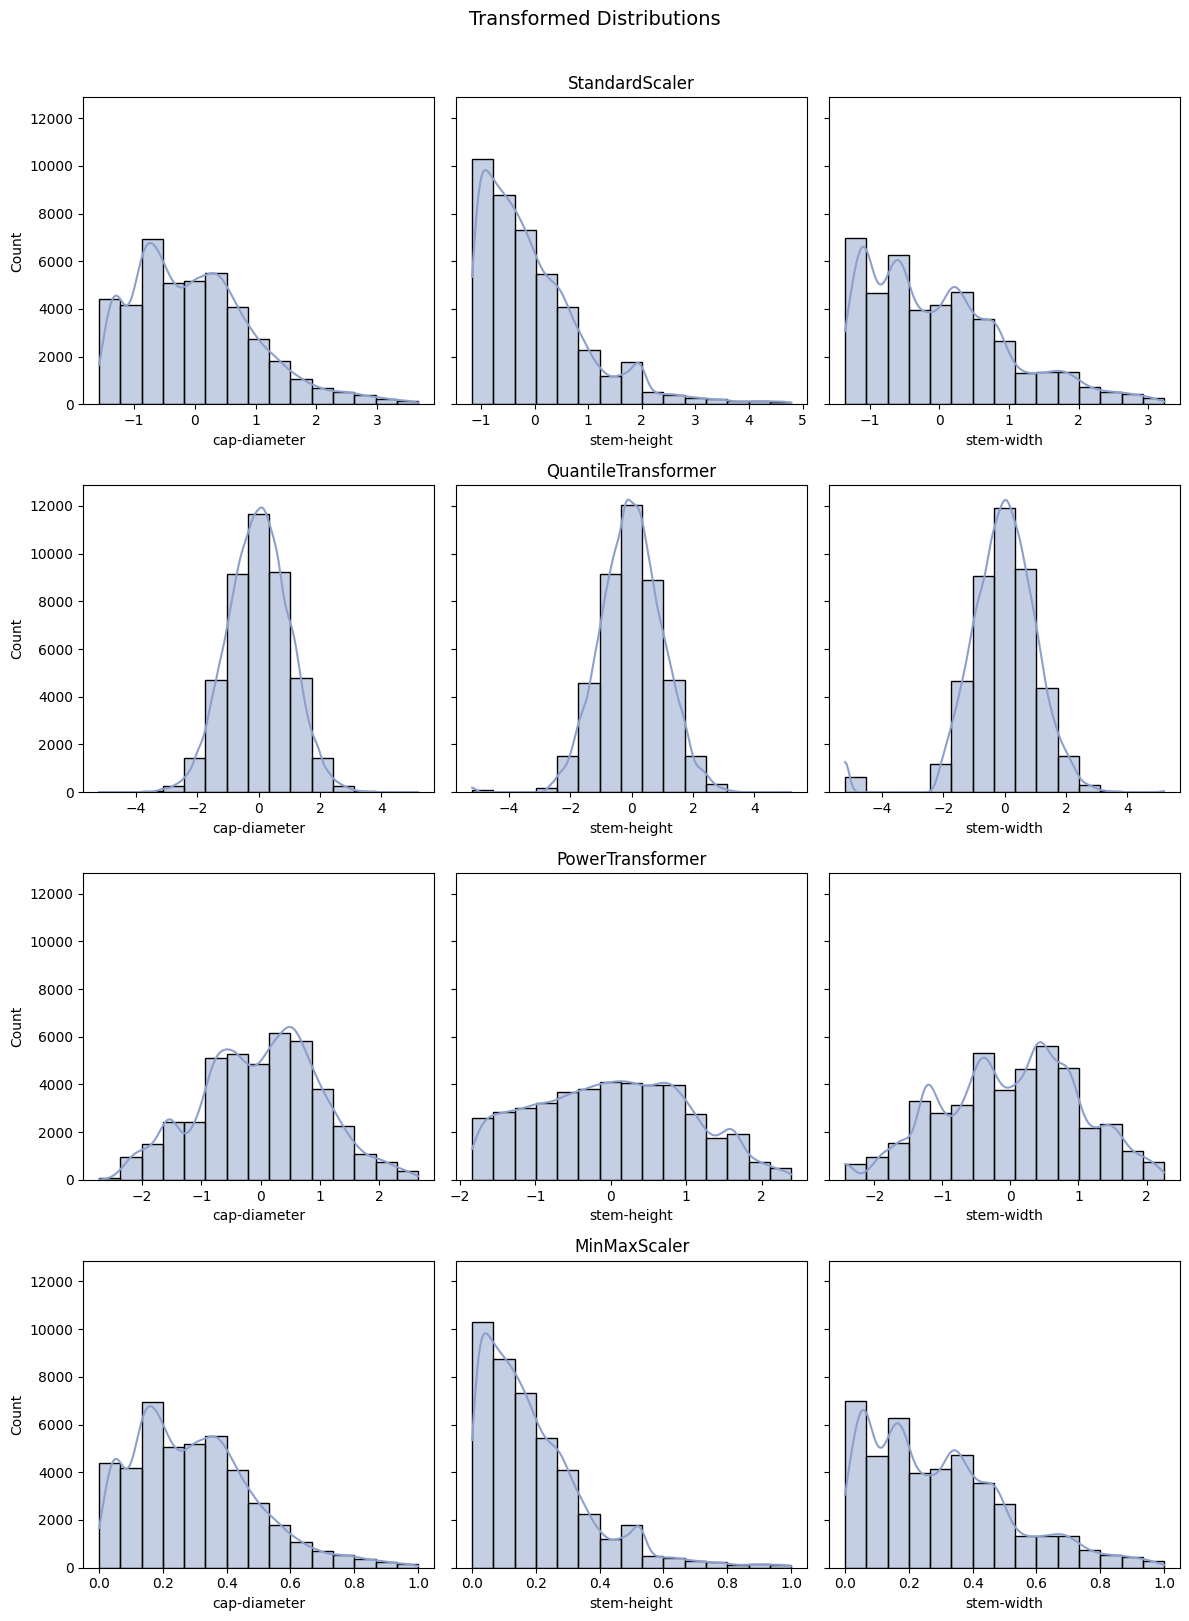

In [36]:
transformers = [
    StandardScaler(),
    QuantileTransformer(output_distribution='normal', random_state=0),
    PowerTransformer(standardize=True),
    MinMaxScaler()
]

fig, axs = plt.subplots(len(transformers), 3, figsize=[12, 4 * len(transformers)], sharey=True)

fig.suptitle("Transformed Distributions", fontsize=14, y=1.01)

for i, t in enumerate(transformers):
  ax = axs
  transformation = t
  X_train_transformed = transformation.fit_transform(X_train[num_columns])
  df_transformed = pd.DataFrame(X_train_transformed,columns=num_columns)

  sns.histplot(x = df_transformed['cap-diameter'],ax=ax[i,0],bins=15,kde=True)
  ax[i,0].set_xlabel('cap-diameter')

  sns.histplot(x = df_transformed['stem-height'],ax=ax[i,1],bins=15,kde=True)
  ax[i,1].set_xlabel('stem-height')
  ax[i,1].set_title(type(transformation).__name__)

  sns.histplot(x = df_transformed['stem-width'],ax=ax[i,2],bins=15,kde=True)
  ax[i,2].set_xlabel('stem-width')

plt.tight_layout()
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer, Normalizer, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [38]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [39]:
scoring_metric = 'roc_auc'

results = []
model_names = []
models = {
    'Logistic Regression: ': LogisticRegression(random_state=42),
    'SVM' : SVC(random_state=42),
    'KNN' : KNeighborsClassifier()
}

for model_name, model in models.items():
  model_names.append(model_name)
  kf = KFold(n_splits=3, random_state=12, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring_metric,n_jobs=-1)
  results.append(cv_results)


[array([0.67065176, 0.67270005, 0.67874515]), array([0.67471533, 0.66399244, 0.66376149]), array([0.78198877, 0.78040015, 0.77972473])]


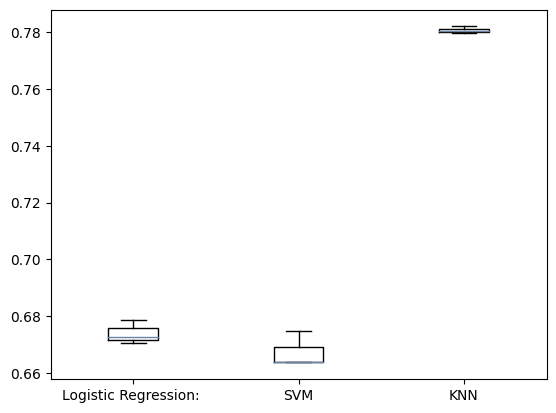

In [40]:
print(results)
plt.boxplot(results, labels=model_names)
plt.show()

In [41]:
# Define preprocessor using columnTransfer

preprocessor = ColumnTransformer(
    transformers=[
        ('quantile', QuantileTransformer(output_distribution='normal'), ['cap-diameter', 'stem-height']),
        ('power', PowerTransformer(), ['stem-width']),
    ],
    remainder='passthrough'
)

# Define the pipeline and parameter grid for K Nearest Neighbours

pipeline_knn = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('classifier',KNeighborsClassifier())
    ]
)

knn_param_grid = {
    'classifier__n_neighbors': [2, 5, 20, 50, 100],
    'classifier__weights': ['uniform', 'distance'],  # Specifying the weights parameter for the KNeighborsClassifier
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__p': [1, 2]
}

# Perform hyperparameter tuining with randomized search and cross-validation
random_search_knn = RandomizedSearchCV(pipeline_knn, param_distributions=knn_param_grid, cv=5, scoring='roc_auc', random_state=42,n_iter=10)
random_search_knn.fit(X_train,y_train)
print("Best Hyperparamets: ",random_search_knn.best_params_)

Best Hyperparamets:  {'classifier__weights': 'distance', 'classifier__p': 2, 'classifier__n_neighbors': 20, 'classifier__algorithm': 'ball_tree'}


In [42]:
print("Best Accuracy: ",random_search_knn.best_score_)

Best Accuracy:  0.9989478472481877


**Confusion Matrix for Training Data**

<Axes: >

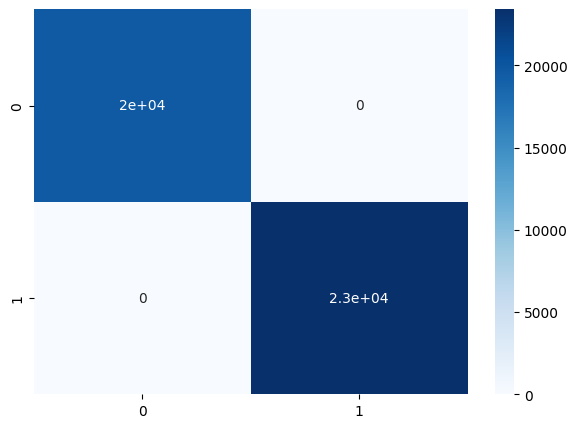

In [64]:
best_model = random_search_knn.best_estimator_
X_train_pred = best_model.predict(X_train)

cm = confusion_matrix(y_train,X_train_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,cmap='Blues')


**ROC AUC Curve for Training Data**

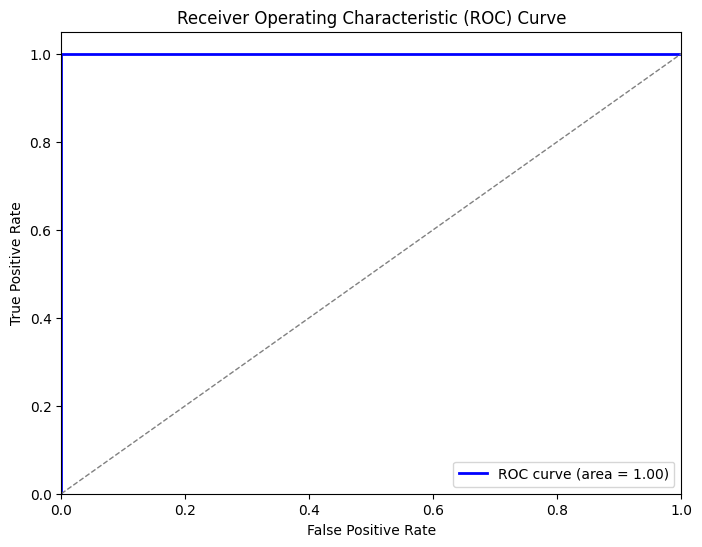

In [65]:
y_prob = best_model.predict_proba(X_train)[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [50]:
# K fold cross validation for knn with best params
preprocessor = ColumnTransformer(
    transformers=[
        ('quantile', QuantileTransformer(output_distribution='normal'), ['cap-diameter', 'stem-height']),
        ('power', PowerTransformer(), ['stem-width']),
    ],
    remainder='passthrough'
)

# Define the pipeline and parameter grid for K Nearest Neighbours

pipeline_knn = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('classifier',KNeighborsClassifier(n_neighbors=20,weights='distance',algorithm='ball_tree',p= 2))
    ]
)

best_params = {
    'classifier__n_neighbors': 20,
    'classifier__weights': 'distance',  # Specifying the weights parameter for the KNeighborsClassifier
    'classifier__algorithm':'ball_tree',
    'classifier__p': 2
}

resultss = []
kf = KFold(n_splits=5, random_state=12, shuffle=True)
cv_results = cross_val_score(pipeline_knn, X_train, y_train, cv=kf, scoring=scoring_metric,n_jobs=-1)
resultss.append(cv_results)


In [51]:
print(resultss)

[array([0.99857266, 0.99898037, 0.99915762, 0.99906987, 0.9983567 ])]


**Confusion Matrix For Test Data**

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4783
           1       0.99      0.99      0.99      5964

    accuracy                           0.99     10747
   macro avg       0.99      0.99      0.99     10747
weighted avg       0.99      0.99      0.99     10747



<Axes: >

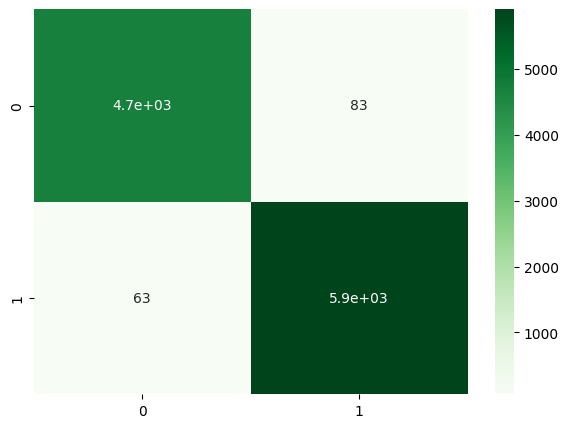

In [57]:
best_model = random_search_knn.best_estimator_

y_pred = best_model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,cmap='Greens')

**ROC AUC Curve for Test Data**

In [62]:
y_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

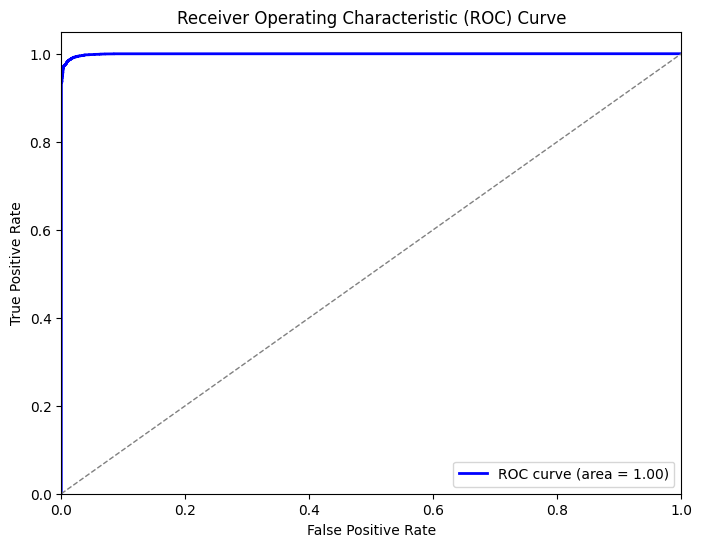

In [63]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
